In [156]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import praw #for reddit wrapper
from fitter import Fitter, get_common_distributions, get_distributions


In [2]:
#https://medium.com/web-mining-is688-spring-2021/how-influencers-on-reddit-form-a-network-of-related-subreddits-30884134c137

In [3]:
#RANDOM GRAPH

def randomGraph(N: int,p: float):
    """
    Creates random graph.
    

    Parameters
    ----------
    N : int
        Number of nodes.

    p : float
        Probability that 2 nodes are connected.

    Returns
    -------
    G : graph_object
        Generated random graph
    """
    G=nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for j in range(N):
            if i<j:
                x=np.random.uniform(0,1)
                if x<p:
                    G.add_edge(i,j)
    return G




In [130]:
A1=randomGraph(2000,0.2)

Number of nodes: 20 
 Number of edges: 36


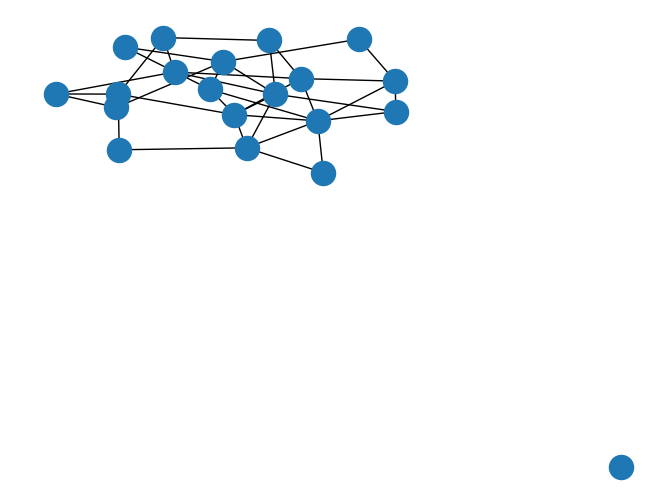

In [129]:
A=randomGraph(20,0.2)
nx.draw(A)

In [139]:
print('Number of nodes:',len(A1.nodes),'\n','Number of edges:',len(A1.edges))

degs=[nx.degree(A1,k) for k in nx.nodes(A1)]
sum_degree_A1=sum(degs)
avg_deg=sum_degree_A1/len(nx.nodes(A1))

variance_deg=sum([(v-avg_deg)**2 for v in degs])/(len(nx.nodes(A1))-1)


print('Average degree:',avg_deg,'\n','Variance of the degrees:',variance_deg)


Number of nodes: 2000 
 Number of edges: 400457
Average degree: 400.457 
 Variance of the degrees: 308.6164592296145


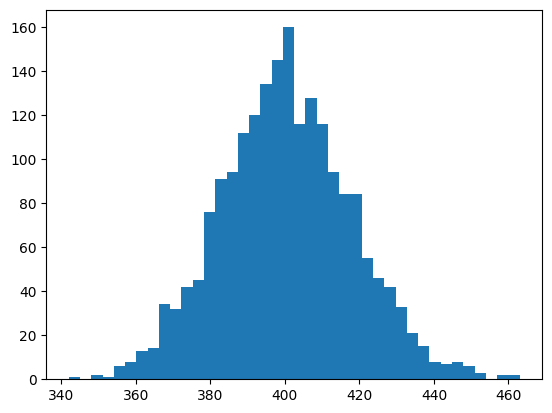

In [150]:
degreesA1=[d for n, d in A1.degree()]
plt.hist(degreesA1,bins=40)
plt.show()

Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.001754,1159.825997,-27870.779217,inf,0.021266,3.217071e-01
beta,0.001755,1162.113273,-27861.842296,inf,0.020867,3.438192e-01
norm,0.001764,1157.798635,-27867.101185,inf,0.029996,5.359747e-02
burr,0.002491,1229.534700,-27161.640876,inf,0.081798,4.344712e-12
lognorm,0.048066,1300.390674,-21249.373301,inf,0.747086,0.000000e+00


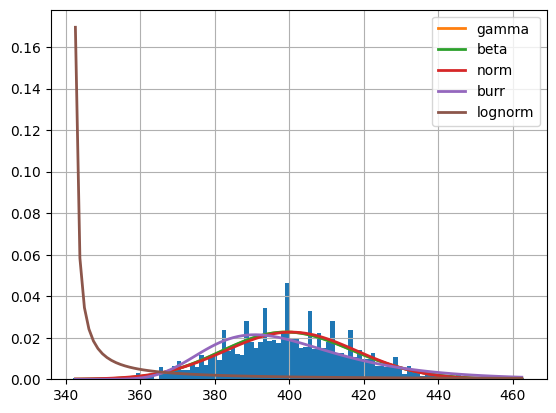

In [157]:
f = Fitter(degreesA1,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [5]:
#Watts-Strogatz model
def watts_strogatz(N: int,K: int,p: float):
    """
    Creates random graph.
    

    Parameters
    ----------
    N : int
        Number of nodes.

    K : int
        Number of neighbors connected to each node.(K even and K<N)

    p : float
        Probability that an edge is rewired.

    Returns
    -------
    G : graph_object
        Generated Watts-Strogatz graph.

    """
    if K%2 != 0:
        raise ValueError("K has to be even!")
    elif K>N:
        raise ValueError("K has to be lower than N!")
    G=nx.Graph()
    Ns=range(N)
    G.add_nodes_from(Ns)

    for i in range(N):
        for k in range(0,K//2):
            if i+k+1>=N:
                G.add_edge(Ns[i],Ns[k])
            else:
                G.add_edge(Ns[i],Ns[i+k+1])

    for e in G.edges():
        i=e[0]
        x=np.random.uniform(0,1)
        l=list(range(N))
        l.remove(i)
        if x<p:
            
            u=np.random.choice(l)
            G.remove_edge(e[0],e[1])
            G.add_edge(i,u)

    return G


    

In [142]:
B1=watts_strogatz(2000,4,0.5)

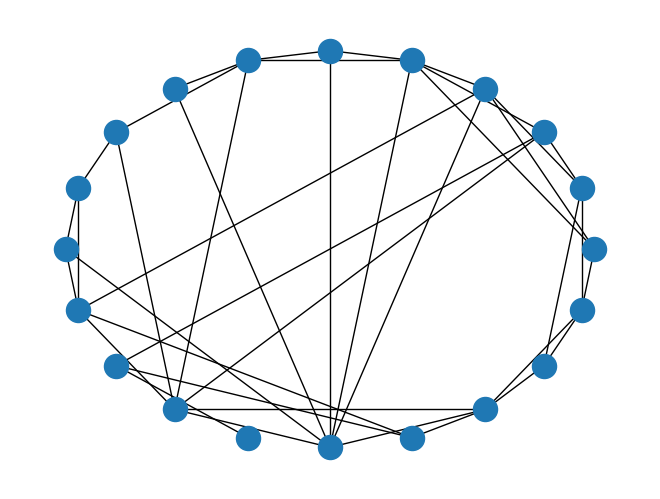

In [141]:
B=watts_strogatz(20,4,0.5)

nx.draw_circular(B)

In [143]:
print('Number of nodes:',len(B1.nodes),'\n','Number of edges:',len(B1.edges))

degs=[nx.degree(B1,k) for k in nx.nodes(B1)]
sum_degree_B1=sum(degs)
avg_deg=sum_degree_B1/len(nx.nodes(B1))

variance_deg=sum([(v-avg_deg)**2 for v in degs])/(len(nx.nodes(B1))-1)


print('Average degree:',avg_deg,'\n','Variance of the degrees:',variance_deg)

Number of nodes: 2000 
 Number of edges: 3994
Average degree: 3.994 
 Variance of the degrees: 1.5397338669334684


2000


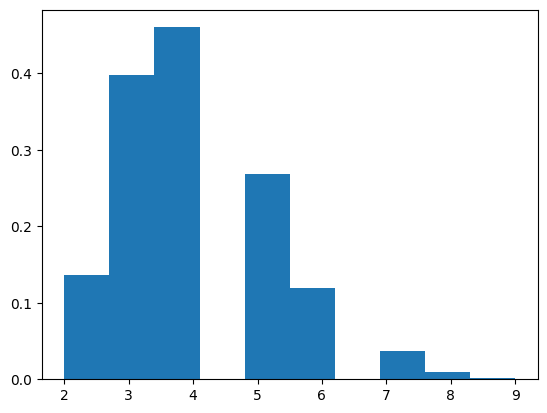

In [166]:
degreesB1=[d for n, d in B1.degree()]
plt.hist(degreesB1,density=True)
plt.show()

Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,44.206276,556.468046,-7601.268678,inf,0.173463,4.266311e-53
gamma,44.211082,553.852922,-7601.051244,inf,0.175937,1.279996e-54
burr,44.215979,581.842048,-7593.228839,inf,0.252930,2.948398e-113
beta,44.261872,571.732503,-7591.154069,inf,0.176883,3.304619e-55
powerlaw,45.368507,422.368441,-7549.365853,inf,0.347336,4.270097e-216


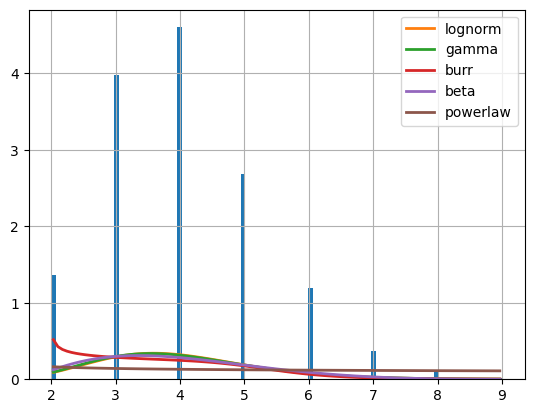

In [163]:
f = Fitter(degreesB1,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "powerlaw"
                          ])
f.fit()
f.summary()

In [7]:
#Barabasi-Albert model


In [147]:
def barabasi_albert(N: int,m: int,t: int):
    """
    Creates random graph.
    

    Parameters
    ----------
    N : int
        Number of nodes.

    m : int
        Number of nodes that new node is connected to.

    t : int
        Number of time steps in graph generation.

    Returns
    -------
    G : graph_object
        Generated Barabasi_Albert graph.

    """
    G=nx.Graph()
    
    for i in range(N-1):
        G.add_edge(i,i+1)
    for j in range(t):
        new_node=max(nx.nodes(G))+1      
        sum_degree=sum([nx.degree(G,k) for k in nx.nodes(G)])
        ps=[nx.degree(G,n)/sum_degree for n in nx.nodes(G)]
        a=np.random.choice(nx.nodes(G),m,p=ps)
        G.add_node(new_node)
        for n in a:
            G.add_edge(new_node,n) 
        
    return G

In [144]:
C1=barabasi_albert(4,3,1996)

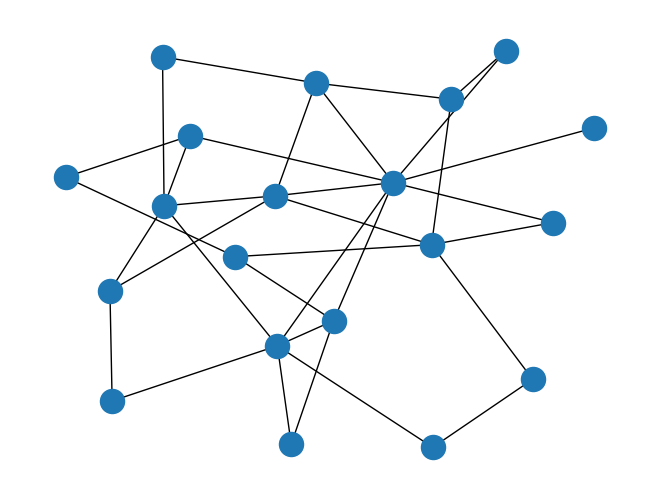

In [145]:
C=barabasi_albert(3,2,17)

nx.draw(C)


In [146]:
print('Number of nodes:',len(C1.nodes),'\n','Number of edges:',len(C1.edges))

degs=[nx.degree(C1,k) for k in nx.nodes(C1)]
sum_degree_C1=sum(degs)
avg_deg=sum_degree_C1/len(nx.nodes(C1))

variance_deg=sum([(v-avg_deg)**2 for v in degs])/(len(nx.nodes(C1))-1)


print('Average degree:',avg_deg,'\n','Variance of the degrees:',variance_deg)

Number of nodes: 2000 
 Number of edges: 5957
Average degree: 5.957 
 Variance of the degrees: 58.573437718861356


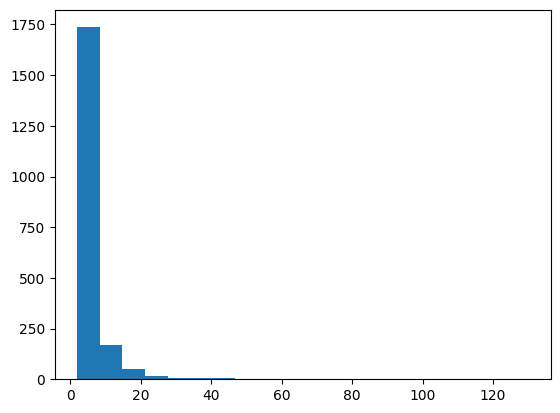

In [154]:
degreesC1=[d for n, d in C1.degree()]
plt.hist(degreesC1,bins=20)
plt.show()

Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.010920,2165.368591,-24213.381390,inf,0.214618,2.464512e-81
beta,0.012600,3528.565926,-23919.443456,inf,0.221554,1.044074e-86
burr,0.021264,1777.144447,-22872.889084,inf,0.239341,2.644788e-101
gamma,0.034891,10669.214601,-21890.064245,inf,0.888869,0.000000e+00
powerlaw,0.066020,1106.205183,-20614.607237,inf,0.417083,1.241469e-315


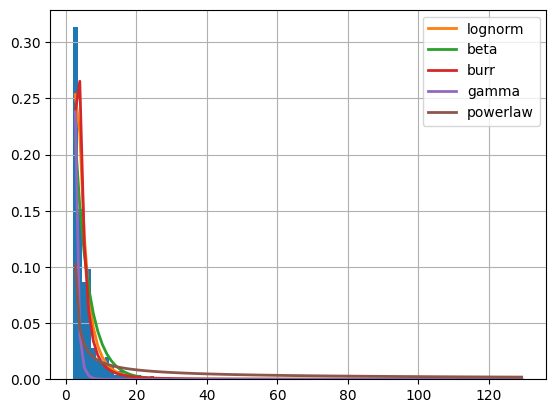

In [168]:
f = Fitter(degreesC1,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "powerlaw"
                          ])
f.fit()
f.summary()

# TASK2

In [10]:
#Setting up the Reddit API in python
reddit = praw.Reddit(client_id='ys7qGrKUBIxdrES3pIXReQ',
                     client_secret='s9FTYgdnW-NL_wtcKC8_Htv7A72c4g',
                     user_agent='my_bot_for_diffusion_process_in_complex_networks'
                    )

In [11]:
def get_posts(subred_name, n):
    subreddit = reddit.subreddit(subred_name)
    posts_info = [] 
    
    for subm in subreddit.top(limit=n):
        
        subred_info = []
        subred_info.append(subm.id)  
        subred_info.append(str(subm.author)) 
        subred_info.append(subm.score)  
        subred_info.append(subm.upvote_ratio)
        subred_info.append(subm.num_comments)
        subred_info.append(subm.subreddit)
        posts_info.append(subred_info)
    
    sorted_info = sorted(posts_info, key=lambda x: x[1], reverse = True)
    posts_df = pd.DataFrame(sorted_info, columns = ['id','author', 'score','upvote_ratio' ,'num_comments', 'subreddit'])
    return posts_df

def get_user_posts(author, n):
    
    redditor = reddit.redditor(author)
    user_posts_list = []
    
    for submission in redditor.submissions.top(limit = n):
        info_list = []
        info_list.append(submission.id)
        info_list.append(submission.score)
        info_list.append(str(submission.author))
        info_list.append(submission.num_comments)
        info_list.append(str(submission.subreddit))
        user_posts_list.append(info_list)
    
    a = sorted(user_posts_list, key=lambda x: x[1], reverse = True)
    user_posts_df = pd.DataFrame(a)
    return user_posts_df 

In [12]:
#prog_df=get_posts('gaming',5000)

In [13]:
#prog_df.head(20)

,id,author,score,upvote_ratio,num_comments,subreddit
0,tfiio1,zipthatlip,89973,0.84,1762,gaming
1,ayvwbe,zerranoman,108174,0.80,2857,gaming
2,6rcpu8,zehnen,107276,0.83,2378,gaming
3,jezwed,yoloman0805,137288,0.86,2066,gaming
4,xxnzvl,yeti0013,89231,0.88,1080,gaming
5,ojnqou,ydntkme,93216,0.93,2647,gaming
6,pt1b6t,yankiwi_,104078,0.89,410,gaming
7,aw90nk,yallmustbelit,101945,0.88,2011,gaming
8,7d1kj8,xaliber_skyrim,114524,0.79,6820,gaming
9,flfgme,xNemz,116583,0.93,512,gaming


In [14]:
#freq_authors = prog_df[prog_df.duplicated(['author'], keep = False)]
#freq_authors = freq_authors[freq_authors.author != 'None']


In [15]:
#authors_lst = list(freq_authors.author.unique())
#authors_df =  pd.DataFrame() 
#authors_df = authors_df.fillna(0)
#for user in reddit.redditors.search("rainbow_"):
    #print(user)

#for u in authors_lst: 
    #try:
        #c = get_user_posts(u, 100)
        #authors_df = pd.concat([authors_df, c])
    #except:
        #pass

In [21]:
#authors_df
#nx_df=authors_df[[2,4]]
#nx_df.to_csv('Reddit_network.csv')


The below network was generated from most active users in the first 5000 posts on r/Gaming on reddit, then I've gathered the other subreddits that these people posted on in their last 100 posts. The resulting network is a network of users form r/Gaming and the subreddits that they have or do not have in common.

In [92]:
nx_df1=pd.read_csv('Reddit_network.csv',skiprows=0,index_col=0)

nx_df1.columns=['user','sub']


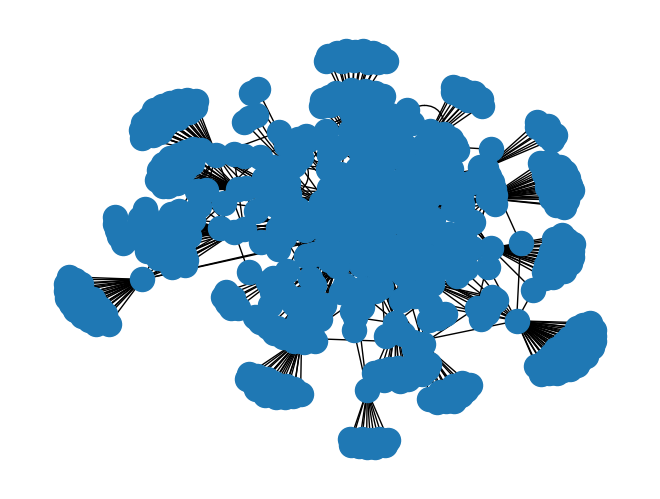

In [70]:
g = nx.from_pandas_edgelist(nx_df1,source='user',target='sub')
nx.draw(g)

In [73]:
#number of edges and nodes
print('Number of nodes:',len(g.nodes),'\n','Number of edges',len(g.edges))

Number of nodes: 635 
 Number of edges 1144


In [108]:

dgrs=nx.degree_centrality(g)

celebs=sorted(dgrs.items(),reverse=True,key=lambda x:x[1])

### celebs is the list of 10 celebrities of the network, those with highest degree centrality
celebs[:10]

[('gaming', 0.08517350157728706),
 ('eljalu', 0.07728706624605677),
 ('TheDarkIsMyLight', 0.06782334384858044),
 ('RumbleDumblee', 0.06624605678233439),
 ('wj7_02', 0.06466876971608833),
 ('prguitarman', 0.06466876971608833),
 ('Brak15', 0.06466876971608833),
 ('sephar3d', 0.06309148264984227),
 ('Petaaa', 0.05205047318611987),
 ('ABiggerBear', 0.05205047318611987)]

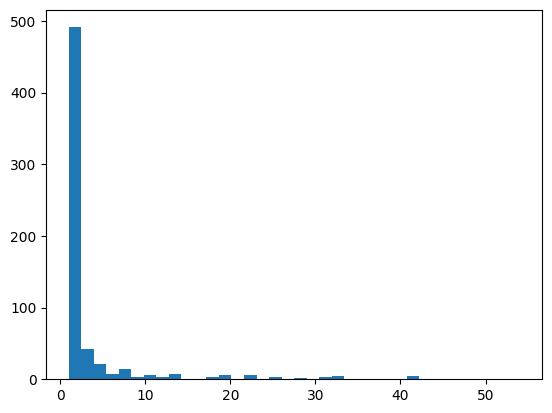

In [122]:
#degree distribution

degrees=[d for n, d in g.degree()]

unq_deg=np.unique(degrees)

plt.hist(degrees,bins=len(unq_deg))
plt.show()


Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.821895,2292.532509,-4203.241477,inf,0.645781,9.952639e-259
beta,0.972923,1088.677096,-4089.668178,inf,0.649364,4.911608e-262
powerlaw,1.031453,1055.070984,-4059.025991,inf,0.645580,1.523305e-258
lognorm,1.166160,1301.157886,-3981.081198,inf,0.653523,6.506445e-266
burr,1.592085,11186.581041,-3776.933935,inf,0.509020,4.613237e-153


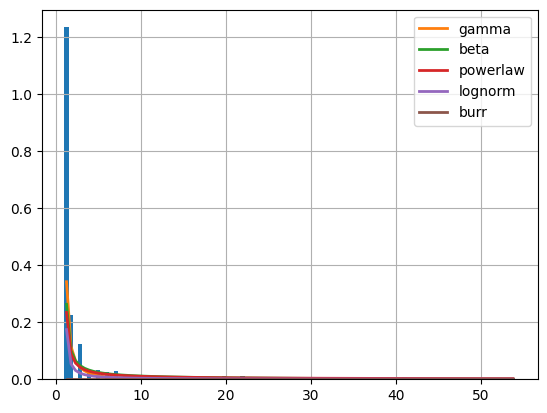

In [169]:
f = Fitter(degrees,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "powerlaw"
                          ])
f.fit()
f.summary()

In [110]:
btwns=nx.betweenness_centrality(g)
bottle_necks=sorted(btwns.items(),reverse=True,key=lambda x:x[1])
## 10 bottlenecks with highest betweenness
bottle_necks[:10]

[('gaming', 0.5772429277066276),
 ('eljalu', 0.12188459986470314),
 ('sephar3d', 0.09481803663036613),
 ('prguitarman', 0.08960818221515597),
 ('RumbleDumblee', 0.08609112282248325),
 ('Brak15', 0.08353517518738805),
 ('Ewoud2001', 0.08159350564166025),
 ('ABiggerBear', 0.06853661889011356),
 ('TheScribe86', 0.06305231078013665),
 ('jmweissman', 0.06171660172555815)]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2be72a1a-6ede-4702-bb85-1f84486961ea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>